# EDA Restaurant Reviews


Using Python 3.13

Using this for an inital look at the data and to play around with it.
We can grab more datasets too

In [1]:
import src.data_cleaning as clean
import src.data_transformation as transform
import src.eda as eda


Space for File Operations


# Here lies an example of the data cleaning modules


In [2]:
files = ['../data/Restaurant_Reviews_Test.tsv',
         '../data/Restaurant_Reviews.csv',
         '../data/Restaurant_Reviews2.txt']

dfs = clean.load_text_to_df(files, columns = ["Review", "Like"], line_length = 2)


In [3]:
df_tsv = dfs['Restaurant_Reviews_Test']
df_tsv.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust is not good .,0.0
2,Wow... Loved this place.,1.0
3,"""""""""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [4]:
df_csv = dfs['Restaurant_Reviews']
df_csv.head()

,Review,Like
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df_txt = dfs['Restaurant_Reviews2']
df_txt.head()

,Review,Like
0,Review,Liked
1,Wow... Loved this place.,1
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1


In [6]:
# Remove Duplicates
df_tsv_remove_dup = clean.remove_duplicates_fuzzy(df_tsv, "Review", threshold = 90)

df_tsv_remove_dup.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust is not good .,0.0
2,"""""""""",NaN
3,Not tasty and the texture was just nasty.,0.0
4,Stopped by during the late May bank holiday of...,1.0


In [7]:
# Normalize the Text (Lowercase & Remove Punctuation, Remove Whitespaces)
df_tsv_norm = clean.normalize_text(df_tsv_remove_dup, "Review")
df_tsv_norm.head()

,Review,Like
0,wow loved this place,1.0
1,crust is not good,0.0
2,,NaN
3,not tasty and the texture was just nasty,0.0
4,stopped by during the late may bank holiday of...,1.0


In [8]:
# Handle Missing Values
df_tsv_na = clean.handle_missing_values(df_tsv, "Review")
df_tsv_na.head()

,Review,Like
0,wow loved this place,1.0
1,crust is not good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


In [9]:
# Original "Dirty" Text Data to demonstrate Mass Cleaning FUnction
df_test = clean.load_text_to_df(['../data/Restaurant_Reviews_Test.tsv'],
                            columns =["Review", "Like"], line_length = 0)
df_tsv_dirty = df_test['Restaurant_Reviews_Test']
df_tsv_dirty.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust is not good .,0.0
2,Wow... Loved this place.,1.0
3,"""""""""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [10]:
# Mass Cleaning FUnction (Remove Duplicates, Normalize, Handle Missing Values)
cleaned_df_tsv = clean.clean_dataframe(df_tsv_dirty, "Review")
cleaned_df_tsv.head()

,Review,Like
0,wow loved this place,1.0
1,crust is not good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


# Here lies examples of the data transformation modules


In [11]:
# Tokenize Dataframe Example
cleaned_df_tsv_tokenized = transform.tokenize_dataframe(cleaned_df_tsv, "Review")
cleaned_df_tsv_tokenized.head()

,Review,Like,Tokenized Text
0,wow loved this place,1.0,"[wow, loved, this, place]"
1,crust is not good,0.0,"[crust, is, not, good]"
2,not tasty and the texture was just nasty,0.0,"[not, tasty, and, the, texture, was, just, nasty]"
3,stopped by during the late may bank holiday of...,1.0,"[stopped, by, during, the, late, may, bank, ho..."
4,the selection on the menu was great and so wer...,1.0,"[the, selection, on, the, menu, was, great, an..."


In [12]:
# Remove Stopwords Example
cleaned_df_tsv_stopword = transform.remove_stopwords(cleaned_df_tsv_tokenized, "Review", custom_stopword = None, new_column = "Review No Stopwords")

cleaned_df_tsv_stopword.head()

,Review,Like,Tokenized Text,Review No Stopwords
0,wow loved this place,1.0,"[wow, loved, this, place]","[wow, loved, place]"
1,crust is not good,0.0,"[crust, is, not, good]","[crust, not, good]"
2,not tasty and the texture was just nasty,0.0,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, just, nasty]"
3,stopped by during the late may bank holiday of...,1.0,"[stopped, by, during, the, late, may, bank, ho...","[stopped, during, late, may, bank, holiday, of..."
4,the selection on the menu was great and so wer...,1.0,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]"


In [13]:
# Label Data Sentiment Example

cleaned_df_tsv_labeled = transform.label_data_sentiment(cleaned_df_tsv_stopword, "Review", new_column = "Review Sentiment")

cleaned_df_tsv_labeled.head()

,Review,Like,Tokenized Text,Review No Stopwords,Review Sentiment
0,wow loved this place,1.0,"[wow, loved, this, place]","[wow, loved, place]",Neutral
1,crust is not good,0.0,"[crust, is, not, good]","[crust, not, good]",Positive
2,not tasty and the texture was just nasty,0.0,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, just, nasty]",Neutral
3,stopped by during the late may bank holiday of...,1.0,"[stopped, by, during, the, late, may, bank, ho...","[stopped, during, late, may, bank, holiday, of...",Neutral
4,the selection on the menu was great and so wer...,1.0,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]",Positive


# Here lies some EDA Transformation Examples


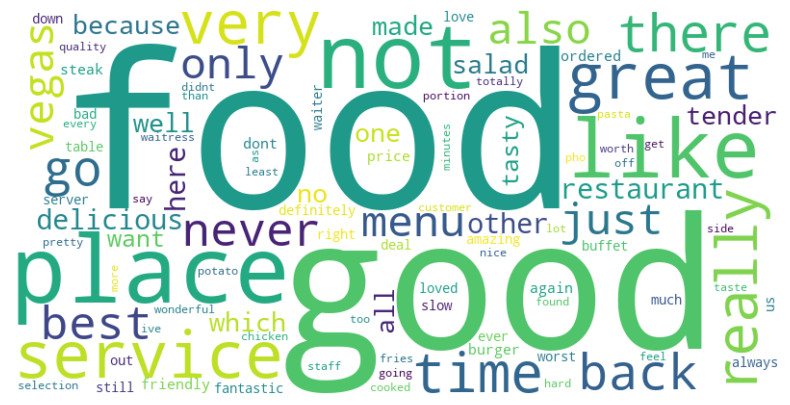

In [14]:
# Generate Wordcloud of No Stopwords Series

cleaned_df_tsv_labeled_wordcloud = eda.generate_wordcloud(cleaned_df_tsv_labeled["Review No Stopwords"].str.join(', '), custom_stopwords=["will", "some", "came"])

In [15]:
# Summary Statistics of our Text Data
cleaned_df_tsv_stopword["Review No Stopwords String"] = cleaned_df_tsv_stopword["Review No Stopwords"].str.join(', ')
eda.text_summary_stats(cleaned_df_tsv_stopword, "Review No Stopwords String")

{'document_stats': {'total_docs': 197, 'empty_docs': 0, 'unique_docs': 197},
 'length_stats': {'min_length': 4,
  'max_length': 126,
  'char_count_mean': 48.54314720812183,
  'char_count_median': 40},
 'word_stats': {'avg_words_per_doc': 6.8274111675126905,
  'total_words': 1345,
  'unique_words': 812,
  'avg_word_length': 6.256505576208179},
 'frequent_words': {'not,': 21,
  'food,': 21,
  'place,': 18,
  'like,': 17,
  'good,': 16,
  'great,': 14,
  'very,': 13,
  'service,': 12,
  'really,': 12,
  'there,': 10}}

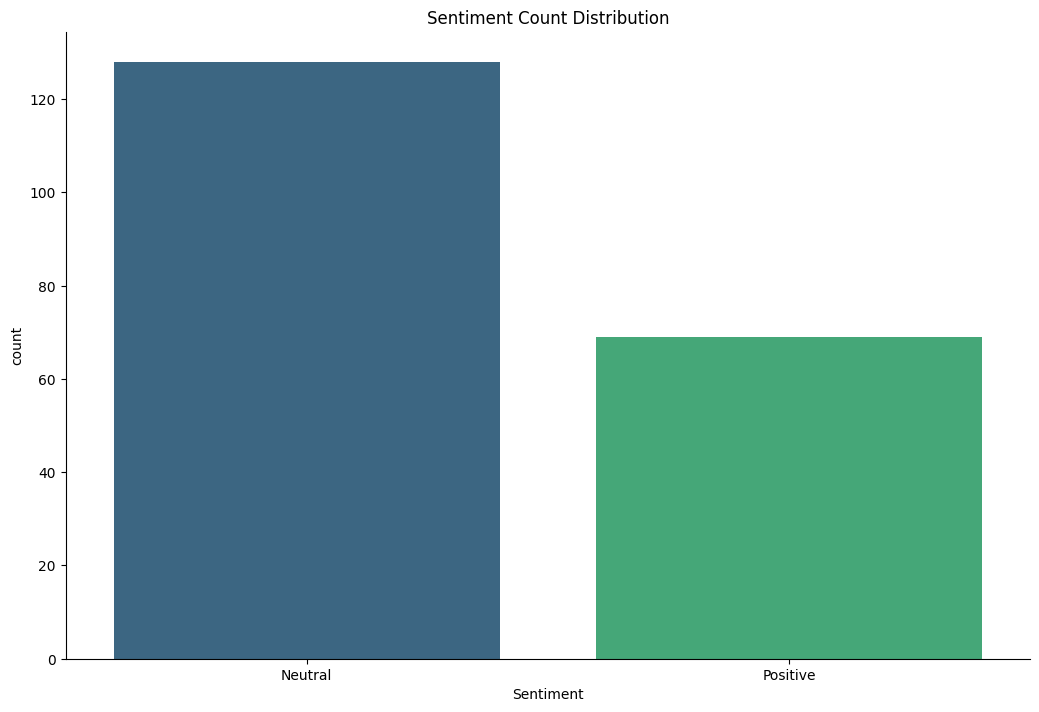

In [18]:
# Sentiment Distribution Graph
eda.plot_sentiment_distribution(cleaned_df_tsv, "Review Sentiment")